Lineare Regression zur Verhersage der RUL.

Model soll die folgende Frage beantworten: Wie lang dauert es bis zum nächsten Ausfall?

Model nutzt für die Vorhersage die Leistungsaufnahme


In [26]:
%matplotlib inline
import pymssql
import pandas as pd
import numpy as np
import datetime

password = "Masterprojekt"
conn = pymssql.connect("pcs.f4.htw-berlin.de",
                       "Masterprojekt", password, "PraediktiveAnalysenTest")
cursor = conn.cursor()

df = pd.read_sql('SELECT * FROM Maschinendaten_20181206', conn)
conn.close()

In [27]:
# Sortierung umkehren
df_s = df.sort_values('ID', ascending = False)

In [28]:
# FehlerID durchsuchen und Zähler anlegen, der angibt wie lang es bis zu nächsten Ausfall dauert
x = []
y = 0
fail = df_s['FehlerID']
for row in fail:
    if row == "x000":
        y += 1
        x.append(y)
    else:
        y = 0
        x.append(y)

In [29]:
# "Ausfallentfernung" an df_s anhängen
df_s['NaechsterAusfall']=x

In [30]:
# Datensätze filtern: alle mit Leistungsaufnahme < 22 raus
df_s = df_s.query('Leistungsaufnahme > 22')
# Datensätze filtern: alle mit Nächster Ausfall > 50 raus
df_s = df_s.query('NaechsterAusfall < 50')

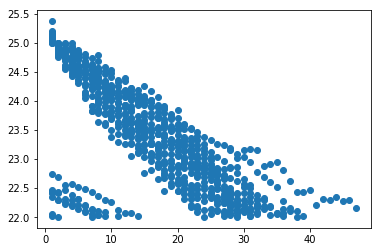

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Scatterplott mit Nächster Ausfall und Leistungsaufnahme anlegen
plt.scatter(df_s['NaechsterAusfall'], df_s['Leistungsaufnahme'])
plt.show()

In [32]:
# Lineare Regression anhand Nächster Ausfall und Leistungsaufnahme berechnen

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_s[['NaechsterAusfall']], df_s[['Leistungsaufnahme']])

print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [24.54936077]
Coef: [[-0.07000105]]


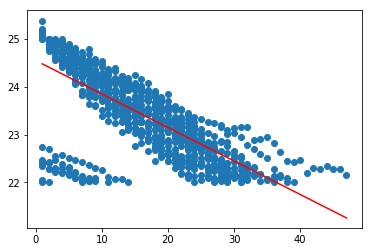

In [33]:
# Lineare Regression anhand Nächster Ausfall und Leistungsaufnahme in Plot zeichnen

min_x = min(df_s['NaechsterAusfall'])
max_x = max(df_s['NaechsterAusfall'])

predicted = model.predict([[min_x],[max_x]])

plt.scatter(df_s['NaechsterAusfall'], df_s['Leistungsaufnahme'])
plt.plot([min_x, max_x], predicted, color = "red")
plt.show()

In [34]:
# neues DF "df_e" mit Nächster Ausfall und Leistungsaufnahme
df_e = df_s.loc[:,['NaechsterAusfall','Leistungsaufnahme']]

In [35]:
# neues Model anhand 95 % der Daten erstellen
from sklearn.model_selection import train_test_split

X = df_e[['NaechsterAusfall']].values
Y = df_e[['Leistungsaufnahme']].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

model_t = LinearRegression()
model_t.fit(X_train, y_train)

predicted_t = model_t.predict(X_test)

print("Intercept: " + str(model_t.intercept_))
print("Coef: " + str(model_t.coef_))

Intercept: [24.5458776]
Coef: [[-0.07006366]]


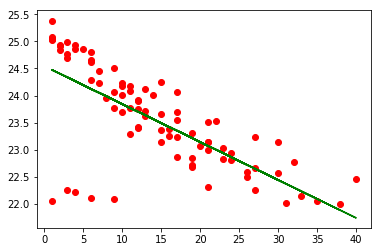

R² Score: 0.512


In [36]:
# Testdaten und Regressionsgerade für visuelle Überprüfung plotten 

plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, predicted_t, color = "green")
plt.show()

# Bestimmtheitsmaß ermitteln
from sklearn.metrics import r2_score

y_test_pred = model_t.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print("R² Score: " + str(round(r2,3)))